In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = data.iloc[:,:13]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y = data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

## Hyperparameter Search

In [6]:
model = KNeighborsClassifier()
param = {'n_neighbors' : [10], 
         'weights' : ['uniform', 'distance'], 
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
         'leaf_size' : range(1,50),
         'p' : [1,2]
        }

clf = GridSearchCV(model, param, scoring = ['accuracy'], refit=False, n_jobs = -1)
best_model = clf.fit(X,y)

In [7]:
# print out the best hyperparameters for fitting k nearest neighbors classifier
best_model.cv_results_['params'][np.argmin(best_model.cv_results_['rank_test_accuracy'])]

{'algorithm': 'ball_tree',
 'leaf_size': 16,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [8]:
# use a 5-fold cross validation to get the average accuracy, f1 score, and area under roc
kf = KFold(n_splits = 10, shuffle = True)
accu_list = []
f1_list = []
roc_list = []

for train_ind, test_ind in kf.split(X): 
    X_train, X_test = X.iloc[train_ind,:], X.iloc[test_ind,:]
    y_train, y_test = y[train_ind], y[test_ind]
    
    for i in range(1,50): 
        model = KNeighborsClassifier(n_neighbors = i, algorithm = 'ball_tree', leaf_size = 16, p = 1, weights = 'distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accu_list.append(accuracy_score(y_pred, y_test))
        f1_list.append(f1_score(y_pred, y_test))
        roc_list.append(roc_auc_score(y_pred, y_test))

In [9]:
length = len(accu_list)
accu_list1 = accu_list[:int(length/10)]
accu_list2 = accu_list[int(length/10):int(length/10)*2]
accu_list3 = accu_list[int(length/10)*2:int(length/10)*3]
accu_list4 = accu_list[int(length/10)*3:int(length/10)*4]
accu_list5 = accu_list[int(length/10)*4:int(length/10)*5]
accu_list6 = accu_list[int(length/10)*5:int(length/10)*6]
accu_list7 = accu_list[int(length/10)*6:int(length/10)*7]
accu_list8 = accu_list[int(length/10)*7:int(length/10)*8]
accu_list9 = accu_list[int(length/10)*8:int(length/10)*9]
accu_list10 = accu_list[int(length/10)*9:]
accu_list = []
for i in range(int(length/10)):
    accu_list.append(np.average([accu_list1[i],accu_list2[i],accu_list3[i],accu_list4[i],accu_list5[i],
                                accu_list6[i],accu_list7[i],accu_list8[i],accu_list9[i],accu_list10[i]]))
    
#accu_std = []
#for i in range(int(length/10)):
#    accu_std.append(np.std([accu_list1[i],accu_list2[i],accu_list3[i],accu_list4[i],accu_list5[i]]))

In [10]:
length = len(f1_list)
f1_list1 = f1_list[:int(length/10)]
f1_list2 = f1_list[int(length/10):int(length/10)*2]
f1_list3 = f1_list[int(length/10)*2:int(length/10)*3]
f1_list4 = f1_list[int(length/10)*3:int(length/10)*4]
f1_list5 = f1_list[int(length/10)*4:int(length/10)*5]
f1_list6 = f1_list[int(length/10)*5:int(length/10)*6]
f1_list7 = f1_list[int(length/10)*6:int(length/10)*7]
f1_list8 = f1_list[int(length/10)*7:int(length/10)*8]
f1_list9 = f1_list[int(length/10)*8:int(length/10)*9]
f1_list10 = f1_list[int(length/10)*9:]
f1_list = []
for i in range(int(length/10)):
    f1_list.append(np.average([f1_list1[i],f1_list2[i],f1_list3[i],f1_list4[i],f1_list5[i],
                                f1_list6[i],f1_list7[i],f1_list8[i],f1_list9[i],f1_list10[i]]))

In [11]:
length = len(roc_list)
roc_list1 = roc_list[:int(length/10)]
roc_list2 = roc_list[int(length/10):int(length/10)*2]
roc_list3 = roc_list[int(length/10)*2:int(length/10)*3]
roc_list4 = roc_list[int(length/10)*3:int(length/10)*4]
roc_list5 = roc_list[int(length/10)*4:int(length/10)*5]
roc_list6 = roc_list[int(length/10)*5:int(length/10)*6]
roc_list7 = roc_list[int(length/10)*6:int(length/10)*7]
roc_list8 = roc_list[int(length/10)*7:int(length/10)*8]
roc_list9 = roc_list[int(length/10)*8:int(length/10)*9]
roc_list10 = roc_list[int(length/10)*9:]
roc_list = []
for i in range(int(length/10)):
    roc_list.append(np.average([roc_list1[i],roc_list2[i],roc_list3[i],roc_list4[i],roc_list5[i],
                                roc_list6[i],roc_list7[i],roc_list8[i],roc_list9[i],roc_list10[i]]))

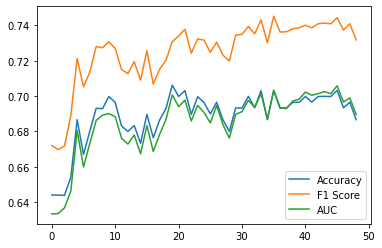

In [12]:
plt.plot(accu_list, label = 'Accuracy') 
plt.plot(f1_list, label = 'F1 Score') 
plt.plot(roc_list, label = 'AUC') 
plt.legend() 
plt.show() 

In [13]:
overall_score = np.array(accu_list) + np.array(f1_list) + np.array(roc_list)

In [14]:
np.argmax(overall_score)

45

In [15]:
overall_score

array([1.94947954, 1.94722125, 1.95241603, 1.98936452, 2.08850053,
       2.03210114, 2.06717221, 2.1074204 , 2.10953682, 2.12067137,
       2.11177412, 2.07438622, 2.06566858, 2.08085787, 2.04982177,
       2.09879892, 2.05191067, 2.07994513, 2.09988772, 2.13775295,
       2.12779291, 2.13868499, 2.09996592, 2.12682406, 2.11896463,
       2.09958787, 2.12168482, 2.09355822, 2.07605432, 2.11754829,
       2.11944004, 2.13685305, 2.12241611, 2.14769762, 2.10395579,
       2.15170698, 2.12291717, 2.12268623, 2.13175999, 2.13348899,
       2.14220901, 2.13577467, 2.14206708, 2.14379458, 2.14206708,
       2.15349334, 2.12728137, 2.13651194, 2.10814886])

In [18]:
overall_score1 = np.array([1.9444265 , 1.9444265 , 1.9934183 , 1.99610207, 2.04722251,
       1.99145769, 1.98270081, 2.00207705, 2.03020952, 2.06669298,
       2.0778327 , 2.05919652, 2.02821851, 2.03033965, 2.0418568 ,
       2.04946371, 2.00057789, 2.02976495, 2.0223148 , 2.04926608,
       2.06609702, 2.05046891, 2.07980556, 2.08993763, 2.11523361,
       2.1396355 , 2.13983114, 2.13760331, 2.13528812, 2.09927655,
       2.11326793, 2.13075746, 2.11449324, 2.12438524, 2.12530722,
       2.14264873, 2.10023208, 2.09537143, 2.09196007, 2.09812453,
       2.07488221, 2.08043502, 2.09300048, 2.07790339, 2.07928779,
       2.05940346, 2.06735924, 2.10317311, 2.06066034])
overall_score2 = np.array([1.94133346, 1.94866458, 2.00131788, 1.9899661 , 2.07105679,
       2.0549558 , 2.02030506, 2.0610152 , 2.0389594 , 2.06128027,
       2.10639101, 2.13534054, 2.11302962, 2.09037068, 2.08649497,
       2.09428065, 2.09538208, 2.04709429, 2.02818252, 2.10442851,
       2.04613338, 2.05162496, 2.05936841, 2.09450757, 2.09750854,
       2.11674671, 2.11653492, 2.12855602, 2.13377293, 2.11793988,
       2.13620941, 2.12744309, 2.1444605 , 2.09851121, 2.11855064,
       2.13609015, 2.15060186, 2.14578605, 2.13083455, 2.10187897,
       2.09120012, 2.11344686, 2.09423489, 2.08928406, 2.10230151,
       2.11001927, 2.0901095 , 2.13576613, 2.09884821])
overall_score3 = np.array([1.99081694, 1.9892456 , 2.01313716, 2.02534742, 2.09811946,
       2.04916184, 2.0849229 , 2.03635479, 2.07489621, 2.06983186,
       2.06679365, 2.05743407, 2.06730986, 2.07135402, 2.06736713,
       2.12335576, 2.09559544, 2.1204041 , 2.08603098, 2.09854952,
       2.05987306, 2.08483183, 2.11187767, 2.12127724, 2.11151545,
       2.1601582 , 2.15040618, 2.15948578, 2.14002964, 2.12876935,
       2.12258268, 2.12579192, 2.12676587, 2.12607449, 2.13866602,
       2.15778847, 2.1465139 , 2.18186559, 2.1606895 , 2.18147954,
       2.19147806, 2.16016379, 2.14527369, 2.15256896, 2.12970316,
       2.14072915, 2.12249418, 2.09580872, 2.12586892])
overall_score4 = np.array([1.930072  , 1.92607756, 1.98559193, 2.02311142, 2.06568146,
       2.08646836, 2.03920763, 2.06827065, 2.10368962, 2.06830377,
       2.11672917, 2.06392829, 2.09088406, 2.08005484, 2.05883676,
       2.05819843, 2.04156094, 2.06244749, 2.07070652, 2.06246492,
       2.08149195, 2.08201479, 2.10297326, 2.10296492, 2.0828271 ,
       2.11401518, 2.09450425, 2.08973414, 2.11702733, 2.09064672,
       2.12180922, 2.11120814, 2.10214581, 2.09374291, 2.11125368,
       2.10254821, 2.1217905 , 2.10207631, 2.07109683, 2.08974988,
       2.06696353, 2.07663621, 2.07772161, 2.10862612, 2.07207695,
       2.10908703, 2.04461512, 2.06035765, 2.05897122])
overall_score5 = np.array([1.94947954, 1.94722125, 1.95241603, 1.98936452, 2.08850053,
       2.03210114, 2.06717221, 2.1074204 , 2.10953682, 2.12067137,
       2.11177412, 2.07438622, 2.06566858, 2.08085787, 2.04982177,
       2.09879892, 2.05191067, 2.07994513, 2.09988772, 2.13775295,
       2.12779291, 2.13868499, 2.09996592, 2.12682406, 2.11896463,
       2.09958787, 2.12168482, 2.09355822, 2.07605432, 2.11754829,
       2.11944004, 2.13685305, 2.12241611, 2.14769762, 2.10395579,
       2.15170698, 2.12291717, 2.12268623, 2.13175999, 2.13348899,
       2.14220901, 2.13577467, 2.14206708, 2.14379458, 2.14206708,
       2.15349334, 2.12728137, 2.13651194, 2.10814886])

In [23]:
overall_score = overall_score1 + overall_score2 + overall_score3 + overall_score4 + overall_score5

In [24]:
overall_score

array([ 9.75612844,  9.75563549,  9.9458813 , 10.02389153, 10.37058075,
       10.21414483, 10.19430861, 10.27513809, 10.35729157, 10.38678025,
       10.47952065, 10.39028564, 10.36511063, 10.35297706, 10.30437743,
       10.42409747, 10.28502702, 10.33965596, 10.30712254, 10.45246198,
       10.38138832, 10.40762548, 10.45399082, 10.53551142, 10.52604933,
       10.63014346, 10.62296131, 10.60893747, 10.60217234, 10.55418079,
       10.61330928, 10.63205366, 10.61028153, 10.59041147, 10.59773335,
       10.69078254, 10.64205551, 10.64778561, 10.58634094, 10.60472191,
       10.56673293, 10.56645655, 10.55229775, 10.57217711, 10.52543649,
       10.57273225, 10.45185941, 10.53161755, 10.45249755])

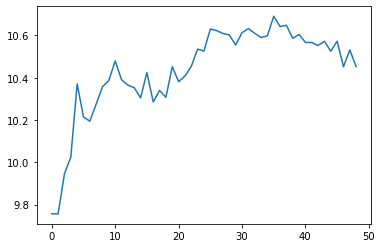

In [25]:
plt.plot(overall_score)

In [26]:
np.argmax(overall_score)

35

Choose n = 35. 

In [53]:
kf = KFold(n_splits = 10, shuffle = True)
accu_list = []
f1_list = []
roc_list = []
y_pred_list = []
y_true_list = [] 

for train_ind, test_ind in kf.split(X): 
    X_train, X_test = X.iloc[train_ind,:], X.iloc[test_ind,:]
    y_train, y_test = y[train_ind], y[test_ind]
    
    model = KNeighborsClassifier(n_neighbors = i, algorithm = 'ball_tree', leaf_size = 16, p = 1, weights = 'distance')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_list.extend(y_pred)
    y_true_list.extend(y_test)
    
    accu_list.append(accuracy_score(y_pred, y_test))
    f1_list.append(f1_score(y_pred, y_test))
    roc_list.append(roc_auc_score(y_pred, y_test))

In [57]:
cm = confusion_matrix(y_true_list, y_pred_list)

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

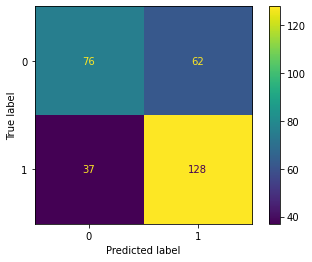

In [61]:
disp.plot()

In [65]:
print(classification_report(y_true_list, y_pred_list))

              precision    recall  f1-score   support

           0       0.67      0.55      0.61       138
           1       0.67      0.78      0.72       165

    accuracy                           0.67       303
   macro avg       0.67      0.66      0.66       303
weighted avg       0.67      0.67      0.67       303

